<center><h1>Prediciting How Much Mashable News is Shared with Regression and Classification</h1></center>
<center><img src='img/mashable-logo.png' height=20% width=20%></center>
Dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

Questions that are getting answered:
    - Regression - How many shares a Mashable article gets from atributes generated from the article?
    - Stretch: What features are cause a high number of shares?
Techniques to use:
    - Scaling data - Each column is differently distributed from each other
    - Apply PCA - There are a lot of features
Models to use:
    - LinearRegression
    - Random Forests
    - Try: Gradient Boosted Trees
    - Stretch: Light GBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

Attribute Information: 
0. url: URL of the article (non-predictive) 
    - delete
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
    - delete
2. n_tokens_title: Number of words in the title 
    - self-explanatory 
3. n_tokens_content: Number of words in the content 
    - self-explanatory 
4. n_unique_tokens: Rate of unique words in the content 
    - self-explanatory
5. n_non_stop_words: Rate of non-stop words in the content 
    - self-explanatory 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
    - ???????
7. num_hrefs: Number of links 
    - self-explanatory 
8. num_self_hrefs: Number of links to other articles published by Mashable 
    - self-explanatory 
9. num_imgs: Number of images 
    - self-explanatory 
10. num_videos: Number of videos 
    - self-explanatory 
11. average_token_length: Average length of the words in the content 
    - self-explanatory 
12. num_keywords: Number of keywords in the metadata 
    - self-explanatory 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
    - self-explanatory 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
    - self-explanatory 
15. data_channel_is_bus: Is data channel 'Business'? 
    - self-explanatory 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
    - self-explanatory 
17. data_channel_is_tech: Is data channel 'Tech'? 
    - self-explanatory 
18. data_channel_is_world: Is data channel 'World'? 
    - self-explanatory 
19. kw_min_min: Worst keyword (min. shares) 
    - ??????
20. kw_max_min: Worst keyword (max. shares) 
    - ??????
21. kw_avg_min: Worst keyword (avg. shares) 
    - ??????
22. kw_min_max: Best keyword (min. shares) 
    - ??????
23. kw_max_max: Best keyword (max. shares) 
    - ??????
24. kw_avg_max: Best keyword (avg. shares) 
    - ??????
25. kw_min_avg: Avg. keyword (min. shares) 
    - ??????
26. kw_max_avg: Avg. keyword (max. shares) 
    - ??????
27. kw_avg_avg: Avg. keyword (avg. shares) 
    - ??????
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
    - self-explanatory 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
    - self-explanatory 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
    - self-explanatory 
31. weekday_is_monday: Was the article published on a Monday? 
    - self-explanatory 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
    - self-explanatory 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
    - self-explanatory 
34. weekday_is_thursday: Was the article published on a Thursday? 
    - self-explanatory 
35. weekday_is_friday: Was the article published on a Friday? 
    - self-explanatory 
36. weekday_is_saturday: Was the article published on a Saturday? 
    - self-explanatory 
37. weekday_is_sunday: Was the article published on a Sunday? 
    - self-explanatory 
38. is_weekend: Was the article published on the weekend? 
    - self-explanatory 
39. LDA_00: Closeness to LDA topic 0 
    - ??????
40. LDA_01: Closeness to LDA topic 1 
    - ??????
41. LDA_02: Closeness to LDA topic 2 
    - ??????
42. LDA_03: Closeness to LDA topic 3 
    - ??????
43. LDA_04: Closeness to LDA topic 4 
    - ??????
44. global_subjectivity: Text subjectivity 
    - ??????
45. global_sentiment_polarity: Text sentiment polarity 
    - ??????
46. global_rate_positive_words: Rate of positive words in the content 
    - ??????
47. global_rate_negative_words: Rate of negative words in the content 
    - ??????
48. rate_positive_words: Rate of positive words among non-neutral tokens 
    - ??????
49. rate_negative_words: Rate of negative words among non-neutral tokens 
    - ??????
50. avg_positive_polarity: Avg. polarity of positive words 
    - ??????
51. min_positive_polarity: Min. polarity of positive words 
    - ??????
52. max_positive_polarity: Max. polarity of positive words 
    - ??????
53. avg_negative_polarity: Avg. polarity of negative words 
    - ??????
54. min_negative_polarity: Min. polarity of negative words 
    - ??????
55. max_negative_polarity: Max. polarity of negative words 
    - ??????
56. title_subjectivity: Title subjectivity 
    - ??????
57. title_sentiment_polarity: Title polarity 
    - ??????
58. abs_title_subjectivity: Absolute subjectivity level 
    - ??????
59. abs_title_sentiment_polarity: Absolute polarity level 
    - ??????
60. shares: Number of shares (target)
    - self-explanatory 

In [2]:
# Read .csv
news_df = pd.read_csv('datasets/OnlineNewsPopularity.csv')

# Remove whitespace from column headers
news_df.rename(columns=lambda x: x.strip(), inplace=True)

# Drop url and timedelta because they are both non-predictive
news_df.drop(['url', 'timedelta'], axis=1, inplace=True)

pd.options.display.max_columns = 999
news_df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306

In [3]:
# Count of null values
news_df.isnull().sum().sum()

0

In [4]:
news_df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

In [5]:
# Create binary categories for news_df 
# 0 if less than or eqaul to 2800
# 1 if greater than 2800

shares_binary_labels = []

for index, row in news_df.iterrows():
    if row['shares'] <= 2800:
        shares_binary_labels.append(0)
    else:
        shares_binary_labels.append(1)

In [6]:
# TODO
# Play around with removing different / unknown features
# Visualize how things are correlated - correlation heatmap
# Visualize outliers
# 

(0.0, 59.0, 59.0, 0.0)

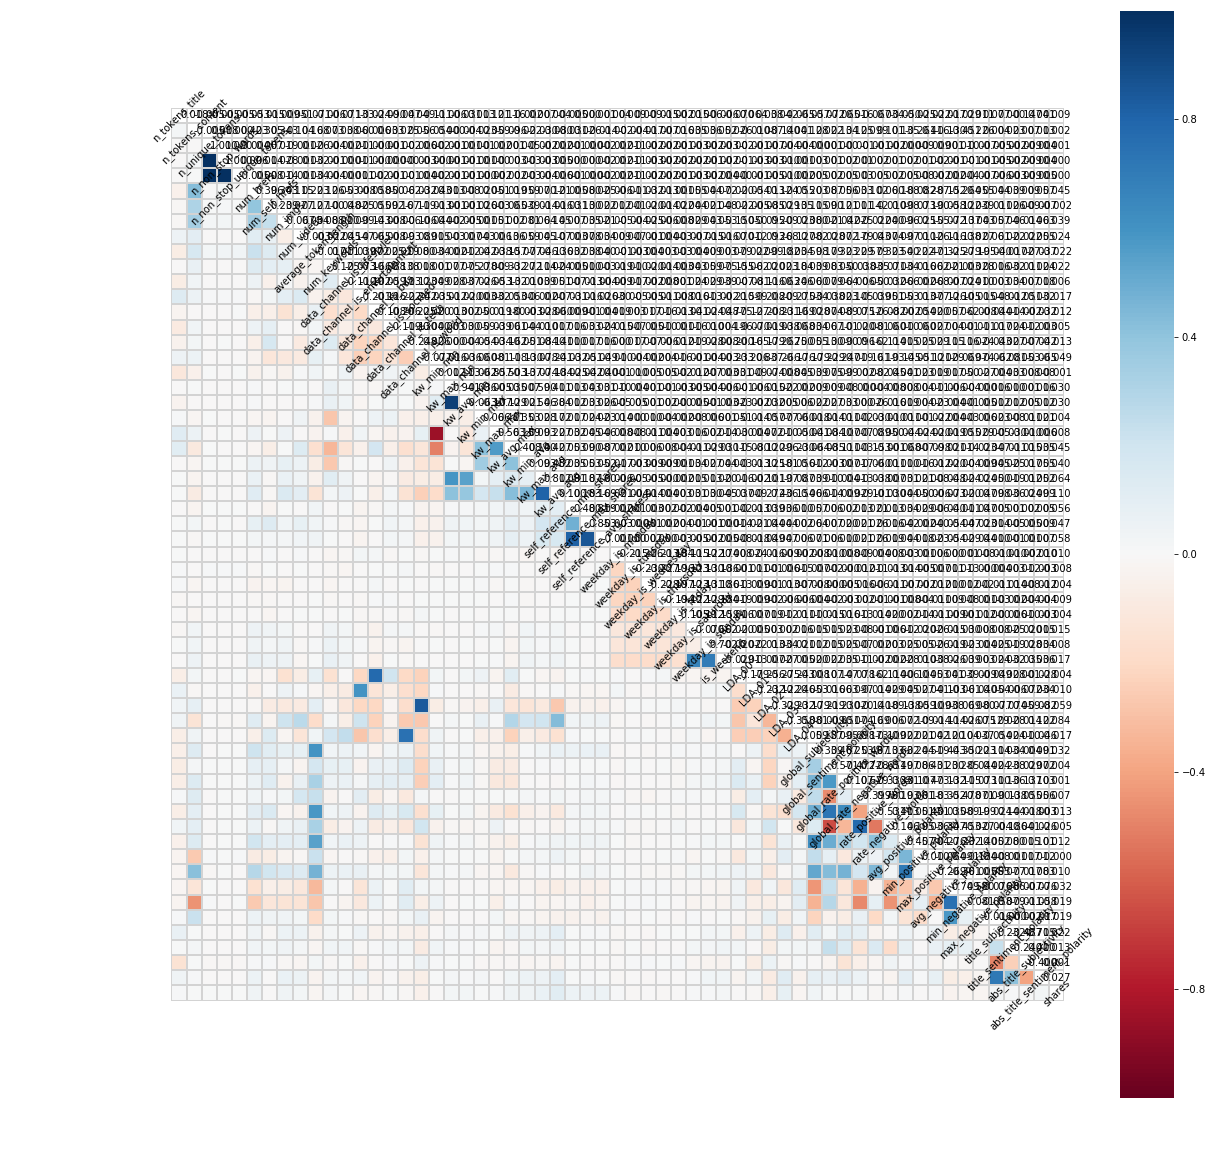

In [7]:
# Code originally found from Aakash Sudhakar's repo - https://github.com/AakashSudhakar/DS-2-Machine-Learning/blob/master/04_Regression_Techniques.ipynb
import seaborn as sns

# Creates correlational data from online news dataset
news_corr = news_df.corr()

# Produces whitespace mask over upper triangle section of plot where data values will be displayed
upper_triangle_mask = np.zeros_like(news_corr, dtype=np.bool)
upper_triangle_mask[np.triu_indices_from(upper_triangle_mask)] = True

# Creates MatPlotLib subplots
fig, ax = plt.subplots(figsize=(20, 20))

# Create correlational heatmap with basic displayed color intensities using sns.heatmap()
vmax = np.abs(news_corr.values[~upper_triangle_mask]).max()
sns.heatmap(news_corr, mask=upper_triangle_mask, cmap="RdBu", vmin=-vmax, vmax=vmax, square=True, linecolor="lightgray", linewidths=1, ax=ax)

# Overlays feature names and correlational data values over whitespace mask in plot
for i in range(len(news_corr)):
    ax.text(i + 0.5, i + 0.5, news_corr.columns[i], ha="center", va="center", rotation=45)
    for j in range(i + 1, len(news_corr)):
        value = "{:.3f}".format(news_corr.values[i, j])
        ax.text(j + 0.5, (i + 0.5), value, ha="center", va="center")
ax.axis("off")

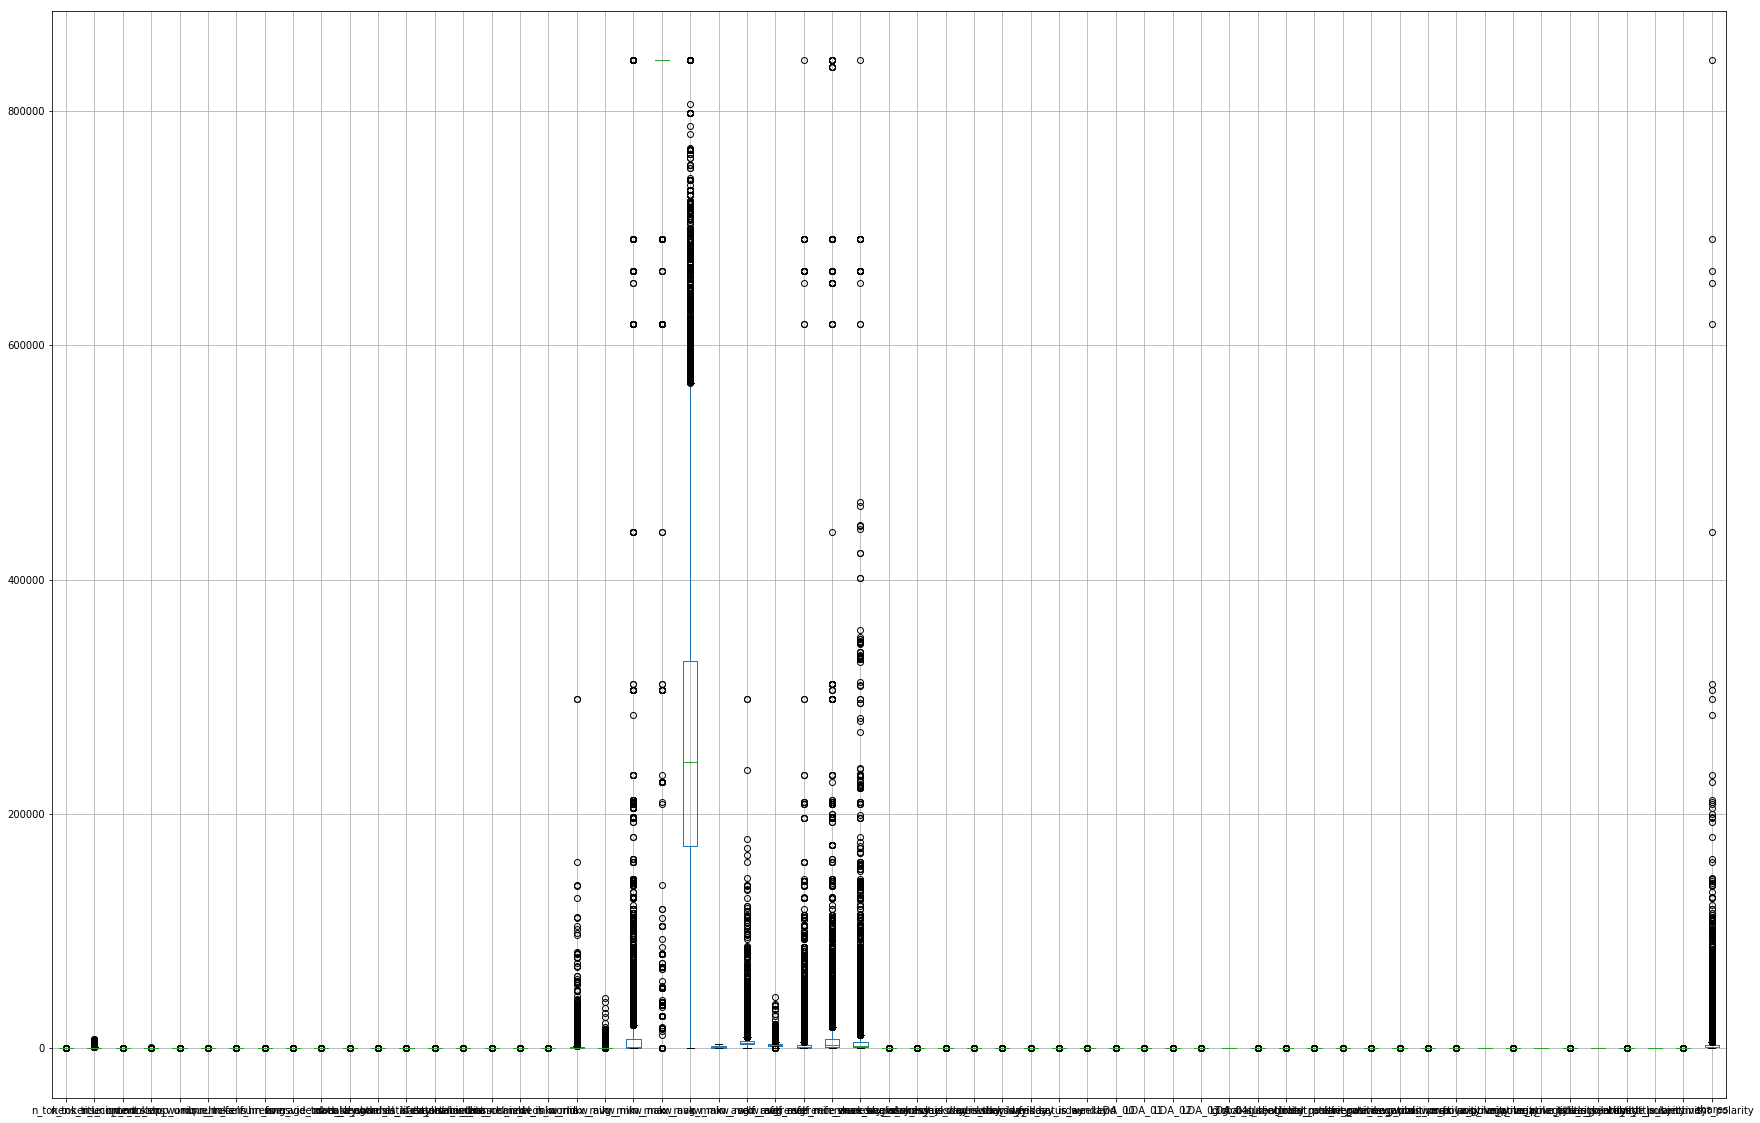

In [8]:
# Visualize box plots of all data and see outliers
news_df.boxplot(figsize=(30,20))

In [9]:
# Calculate quartiles and IQR for data set
Q1 = news_df.quantile(0.25)
Q3 = news_df.quantile(0.75)
IQR = Q3 - Q1

# Calculate number of outliers for each column
((news_df < (Q1 - 1.5 * IQR)) | (news_df > (Q3 + 1.5 * IQR))).sum()

n_tokens_title                    156
n_tokens_content                 1933
n_unique_tokens                  1604
n_non_stop_words                 2827
n_non_stop_unique_tokens         1733
num_hrefs                        2169
num_self_hrefs                   2090
num_imgs                         7703
num_videos                       2946
average_token_length             1681
num_keywords                       51
data_channel_is_lifestyle        2099
data_channel_is_entertainment    7057
data_channel_is_bus              6258
data_channel_is_socmed           2323
data_channel_is_tech             7346
data_channel_is_world            8427
kw_min_min                       4677
kw_max_min                       3661
kw_avg_min                       2081
kw_min_max                       5063
kw_max_max                       9440
kw_avg_max                        960
kw_min_avg                          0
kw_max_avg                       2391
kw_avg_avg                       1629
self_referen

In [10]:
from scipy import stats
# Attempt to remove outliers
no_outliers_df = news_df[(np.abs(stats.zscore(news_df)) < 3).all(axis=1)]

# Check if there are still outliers
((no_outliers_df < (Q1 - 1.5 * IQR)) | (no_outliers_df > (Q3 + 1.5 * IQR))).sum()

n_tokens_title                      0
n_tokens_content                  505
n_unique_tokens                    78
n_non_stop_words                  658
n_non_stop_unique_tokens          140
num_hrefs                         572
num_self_hrefs                    759
num_imgs                         3299
num_videos                        996
average_token_length              204
num_keywords                        0
data_channel_is_lifestyle           0
data_channel_is_entertainment    3177
data_channel_is_bus              4441
data_channel_is_socmed              0
data_channel_is_tech             4958
data_channel_is_world            5990
kw_min_min                        884
kw_max_min                       1632
kw_avg_min                        771
kw_min_max                       2193
kw_max_max                       3652
kw_avg_max                        249
kw_min_avg                          0
kw_max_avg                        853
kw_avg_avg                        411
self_referen

In [11]:
no_outliers_df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,21009.000000,21009.000000,21009.000000,2.100900e+04,21009.000000,21009.000000,21009.00000,21009.000000,21009.000000,21009.000000,21009.000000,21009.0,21009.000000,21009.000000,21009.0,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.0,21009.0,21009.0,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000
mean,10.461992,517.244276,0.547082,1.000000e+00,0.697540,9.673235,3.02794,3.495026,0.670808,4.698656,7.206864,0.0,0.151221,0.211386,0.0,0.235994,0.285116,9.778714,908.105929,258.042822,7827.141892,811723.528012,273631.726607,1043.463480,4983.472524,2943.432380,2968.252794,6804.864190,4533.132837,0.192632,0.215289,0.216955,0.209434,0.165691,0.0,0.0,0.0,0.191753,0.116811,0.259535,0.183957,0.247944,0.446494,0.118508,0.039478,0.016457,0.702953,0.297047,0.353161,0.092775,0.760608,-0.251431,-0.515562,-0.099357,0.256786,0.058025,0.344337,0.126577,2426.011090
std,2.063260,336.561186,0.091190,3.328885e-09,0.088944,7.278003,2.44397,5.346156,1.660483,0.273076,1.873460,0.0,0.358273,0.408301,0.0,0.424629,0.451480,43.303711,1079.269911,208.664572,17946.599375,72467.397540,108464.999793,1056.507327,2304.395787,892.350375,6145.430333,12166.498643,7457.244156,0.394376,0.411032,0.412181,0.406914,0.371812,0.0,0.0,0.0,0.270789,0.178562,0.305336,0.268883,0.293361,0.083387,0.084371,0.014823,0.008940,0.141378,0.141378,0.076291,0.047911,0.208932,0.105220,0.274614,0.057607,0.308140,0.214319,0.188500,0.182420,3555.589858
min,5.000000,34.000000,0.240102,1.000000e+00,0.268631,0.000000,0.00000,0.000000,0.000000,3.624585,2.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,111300.000000,34580.000000,-1.000000,2833.706673,488.982313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.018182,0.018182,0.018183,0.018183,0.018183,0.100000,-0.170000,0.003497,0.000000,0.250000,0.000000,0.050000,0.033333,0.050000,-0.640741,-1.000000,-0.388889,0.000000,-0.714286,0.000000,0.000000,22.000000
25%,9.000000,270.000000,0.483871,1.000000e+00,0.641463,5.000000,1.00000,1.000000,0.000000,4.512456,6.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-1.000000,447.000000,134.285714,0.000000,843300.000000,190614.285714,0.000000,3511.757232,2344.514611,706.000000,1100.000000,1011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.025048,0.025006,0.028574,0.025057,0.028583,0.393519,0.062405,0.028812,0.010239,0.611111,0.200000,0.304571,0.050000,0.600000,-0.313394,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,885.000000
50%,10.00

In [12]:
# Take off shares column
og_shares_label = news_df['shares']

# Drop columnd
news_df.drop('shares', axis=1, inplace=True)
news_df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.

In [13]:
# Take off shares column
shares_label = no_outliers_df['shares']

# Drop columnd
no_outliers_df.drop('shares', axis=1, inplace=True)
no_outliers_df.describe()

/Users/anselbridgewater/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,21009.000000,21009.000000,21009.000000,2.100900e+04,21009.000000,21009.000000,21009.00000,21009.000000,21009.000000,21009.000000,21009.000000,21009.0,21009.000000,21009.000000,21009.0,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.0,21009.0,21009.0,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000
mean,10.461992,517.244276,0.547082,1.000000e+00,0.697540,9.673235,3.02794,3.495026,0.670808,4.698656,7.206864,0.0,0.151221,0.211386,0.0,0.235994,0.285116,9.778714,908.105929,258.042822,7827.141892,811723.528012,273631.726607,1043.463480,4983.472524,2943.432380,2968.252794,6804.864190,4533.132837,0.192632,0.215289,0.216955,0.209434,0.165691,0.0,0.0,0.0,0.191753,0.116811,0.259535,0.183957,0.247944,0.446494,0.118508,0.039478,0.016457,0.702953,0.297047,0.353161,0.092775,0.760608,-0.251431,-0.515562,-0.099357,0.256786,0.058025,0.344337,0.126577
std,2.063260,336.561186,0.091190,3.328885e-09,0.088944,7.278003,2.44397,5.346156,1.660483,0.273076,1.873460,0.0,0.358273,0.408301,0.0,0.424629,0.451480,43.303711,1079.269911,208.664572,17946.599375,72467.397540,108464.999793,1056.507327,2304.395787,892.350375,6145.430333,12166.498643,7457.244156,0.394376,0.411032,0.412181,0.406914,0.371812,0.0,0.0,0.0,0.270789,0.178562,0.305336,0.268883,0.293361,0.083387,0.084371,0.014823,0.008940,0.141378,0.141378,0.076291,0.047911,0.208932,0.105220,0.274614,0.057607,0.308140,0.214319,0.188500,0.182420
min,5.000000,34.000000,0.240102,1.000000e+00,0.268631,0.000000,0.00000,0.000000,0.000000,3.624585,2.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,111300.000000,34580.000000,-1.000000,2833.706673,488.982313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.018182,0.018182,0.018183,0.018183,0.018183,0.100000,-0.170000,0.003497,0.000000,0.250000,0.000000,0.050000,0.033333,0.050000,-0.640741,-1.000000,-0.388889,0.000000,-0.714286,0.000000,0.000000
25%,9.000000,270.000000,0.483871,1.000000e+00,0.641463,5.000000,1.00000,1.000000,0.000000,4.512456,6.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-1.000000,447.000000,134.285714,0.000000,843300.000000,190614.285714,0.000000,3511.757232,2344.514611,706.000000,1100.000000,1011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.025048,0.025006,0.028574,0.025057,0.028583,0.393519,0.062405,0.028812,0.010239,0.611111,0.200000,0.304571,0.050000,0.600000,-0.313394,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,420.000000,0.543814,1.000000e+00,0.696774,8.000000,3.00000,1

In [14]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Create LinearRegression object
lin_reg = LinearRegression()

# Create KFold object
k_fold = KFold(n_splits=20, shuffle=True)

# Getting the cross validation scores of linear regression model
cv_scores = cross_val_score(lin_reg, news_df, og_shares_label, cv=k_fold, scoring='r2')
print(cv_scores)
# print(cross_val_score(lin_reg, df, targets, cv=k_fold))
# Getting the r^2 score does not require scoring to be specified to r2

# Get the mean of the scores
scores_mean = np.mean(cv_scores)
scores_mean

[ 0.02393044 -0.00823697  0.01089452  0.06448598 -0.00215407  0.0421436
  0.02712367  0.03900095  0.04356227  0.01258532  0.01324228  0.00408864
  0.01145648  0.02107872  0.01623178  0.025968    0.02498877 -0.00081145
  0.03173331  0.07032116]


0.023581670241498532

In [15]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Create LinearRegression object
lin_reg = LinearRegression()

# Create KFold object
k_fold = KFold(n_splits=20, shuffle=True)

# Getting the cross validation scores of linear regression model
cv_scores = cross_val_score(lin_reg, no_outliers_df, shares_label, cv=k_fold, scoring='r2')
print(cv_scores)
# print(cross_val_score(lin_reg, df, targets, cv=k_fold))
# Getting the r^2 score does not require scoring to be specified to r2

# Get the mean of the scores
scores_mean = np.mean(cv_scores)
scores_mean

[ 0.0623919   0.10432123  0.04811298  0.0618482   0.11535212  0.09135213
  0.0964892   0.06342069  0.04964458  0.03673611  0.0989818   0.09438344
  0.08710256  0.08283381  0.03419128  0.12748102  0.08912512  0.08873265
  0.07946339  0.04100396]


0.077648408999445334

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a new StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the pima indians diabetes data
scaler.fit(news_df)

# Use scaler.transform() on the diabetes data and store the results below
scaled_data = scaler.transform(news_df)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Use train_test_split to split the data into X_train, X_test, y_train, and y_test variables
X_train, X_test, y_train, y_test = train_test_split(scaled_data, shares_binary_labels)

# Initialize and fit a RandomForestClassifier with default values for all 3 inputs
forest_clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2)
forest_clf.fit(X_train, y_train)

# Use the fitted model to create predictions for the X_test data.
news_preds = forest_clf.predict(X_test)

# See scores for model
print("accuracy score: {}".format(accuracy_score(y_test, news_preds)))
print("f1 score: {}".format(f1_score(y_test, news_preds, average='weighted')))

accuracy score: 0.7576430229038442
f1 score: 0.6870172895057782
